# Task 3: Data Wrangling and Analysis

### 3.1 Data Selection and Wrangling:


In [115]:
# Select a subset of columns relevant to a hypothetical question of interest (e.g., predicting a target variable):

# Of the columns in the dataset, we would like to predict the total sales of a game. To predict this, we would like to use the following columns:
# - Genre
# - critic_score
# - console
# - publisher


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [116]:
# Firstly we load the data with pickle
with open('../Data/clean_data.pkl', 'rb') as dataOutput:
    cleanedDf = pkl.load(dataOutput)
    
# Use .groupby() to aggregate data and calculate mean values for each category of a selected categorical variable.

# We want to see the mean of total sales for each of our categorical variables
groupedGenre = cleanedDf.groupby('genre').agg({'total_sales': 'mean'})
groupedGenre.sort_values('total_sales', ascending=False, inplace=True)
groupedGenre

,total_sales
genre,
Sports,0.105674
Education,0.105000
Platform,0.104500
Action,0.094582
Fighting,0.092602
Racing,0.088505
Shooter,0.088475
Action-Adventure,0.078571
Misc,0.078429


After sorting the mean values of total sales for each of the different game genres, we can tell that theres a big difference between the different values.

Sports being the most succesful genre in terms of sales and strategy being the least.


In [117]:
groupedPublisher = cleanedDf.groupby('publisher').agg({'total_sales': 'mean'})
groupedPublisher.sort_values('total_sales', ascending=False, inplace=True)
groupedPublisher

,total_sales
publisher,
Knowledge Adventure,0.370
Imagic,0.370
Tigervision,0.365
Data Age,0.355
ITT Family Games,0.340
...,...
iEntertainment Network,0.000
Virgin Play,0.000
Virtual Playground,0.000


Theres a 656 different publishers, so its difficult for us to evaluate each publisher's sales amount compared to the amount of releases.


In [118]:
# Now we can check the mean total sales for each console
groupedConsole = cleanedDf.groupby('console').agg({'total_sales': 'mean'})
groupedConsole.sort_values('total_sales', ascending=False, inplace=True)
groupedConsole

,total_sales
console,
2600,0.290781
N64,0.194710
GC,0.145592
XB,0.143802
PS,0.122520
NES,0.122500
GBA,0.115907
X360,0.108535
Wii,0.101411


...

In [119]:
# Mean total sales for each critic score
cleanedDf['critic_score_cat'] = pd.cut(cleanedDf['critic_score'], bins=[6, 7, 8, 10], labels=['low', 'medium', 'high'])
# We changed the critic score to a categorical variable and also changed the bins for a better representation of the distribution



groupedCritics = cleanedDf.groupby('critic_score_cat').agg({'total_sales': 'mean'})
groupedCritics.sort_values('total_sales', ascending=False, inplace=True)
groupedCritics

C:\Users\pelle\AppData\Local\Temp\ipykernel_11040\1128231055.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupedCritics = cleanedDf.groupby('critic_score_cat').agg({'total_sales': 'mean'})


,total_sales
critic_score_cat,
high,0.122051
medium,0.080826
low,0.075765


There is a definant correlation between the total sales and the critics score, which in our minds make sense.


### 3.2 Data Analysis


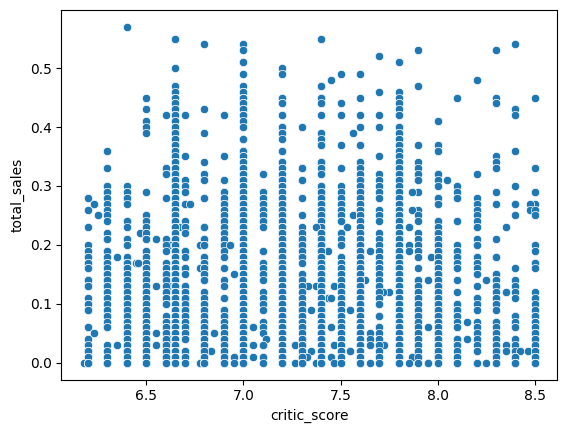

In [123]:
# Use seaborn to create scatter plots to visualize relationships between pairs of numerical variables.(X an Y axis are used for the variables)

sns.scatterplot(x='critic_score', y='total_sales', data=cleanedDf)
plt.show()

This scatter plot indicates that it is difficult to find a correlation between the critics score and the total sales of a game, which is in contrast to our conclusion in 3.1.



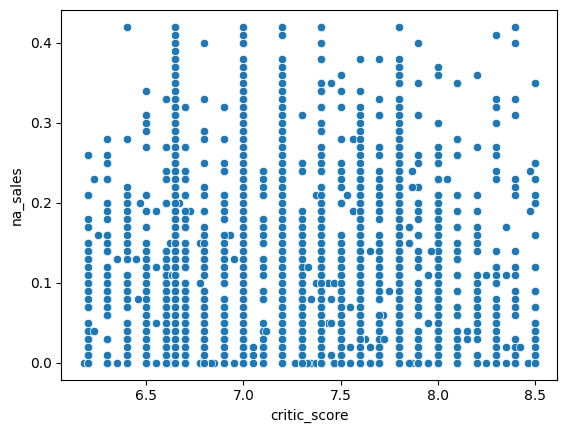

In [124]:
sns.scatterplot(x='critic_score', y='na_sales', data=cleanedDf)
plt.show()

It is also very difficult to find a correlation between sales in North America and critics score

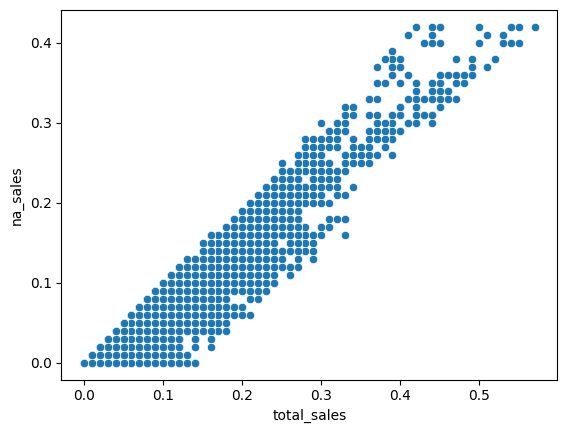

In [125]:
sns.scatterplot(x='total_sales', y='na_sales', data=cleanedDf)
plt.show()

We can tell that the total sales worldwide is heavily correlated with the sales amount in North America.

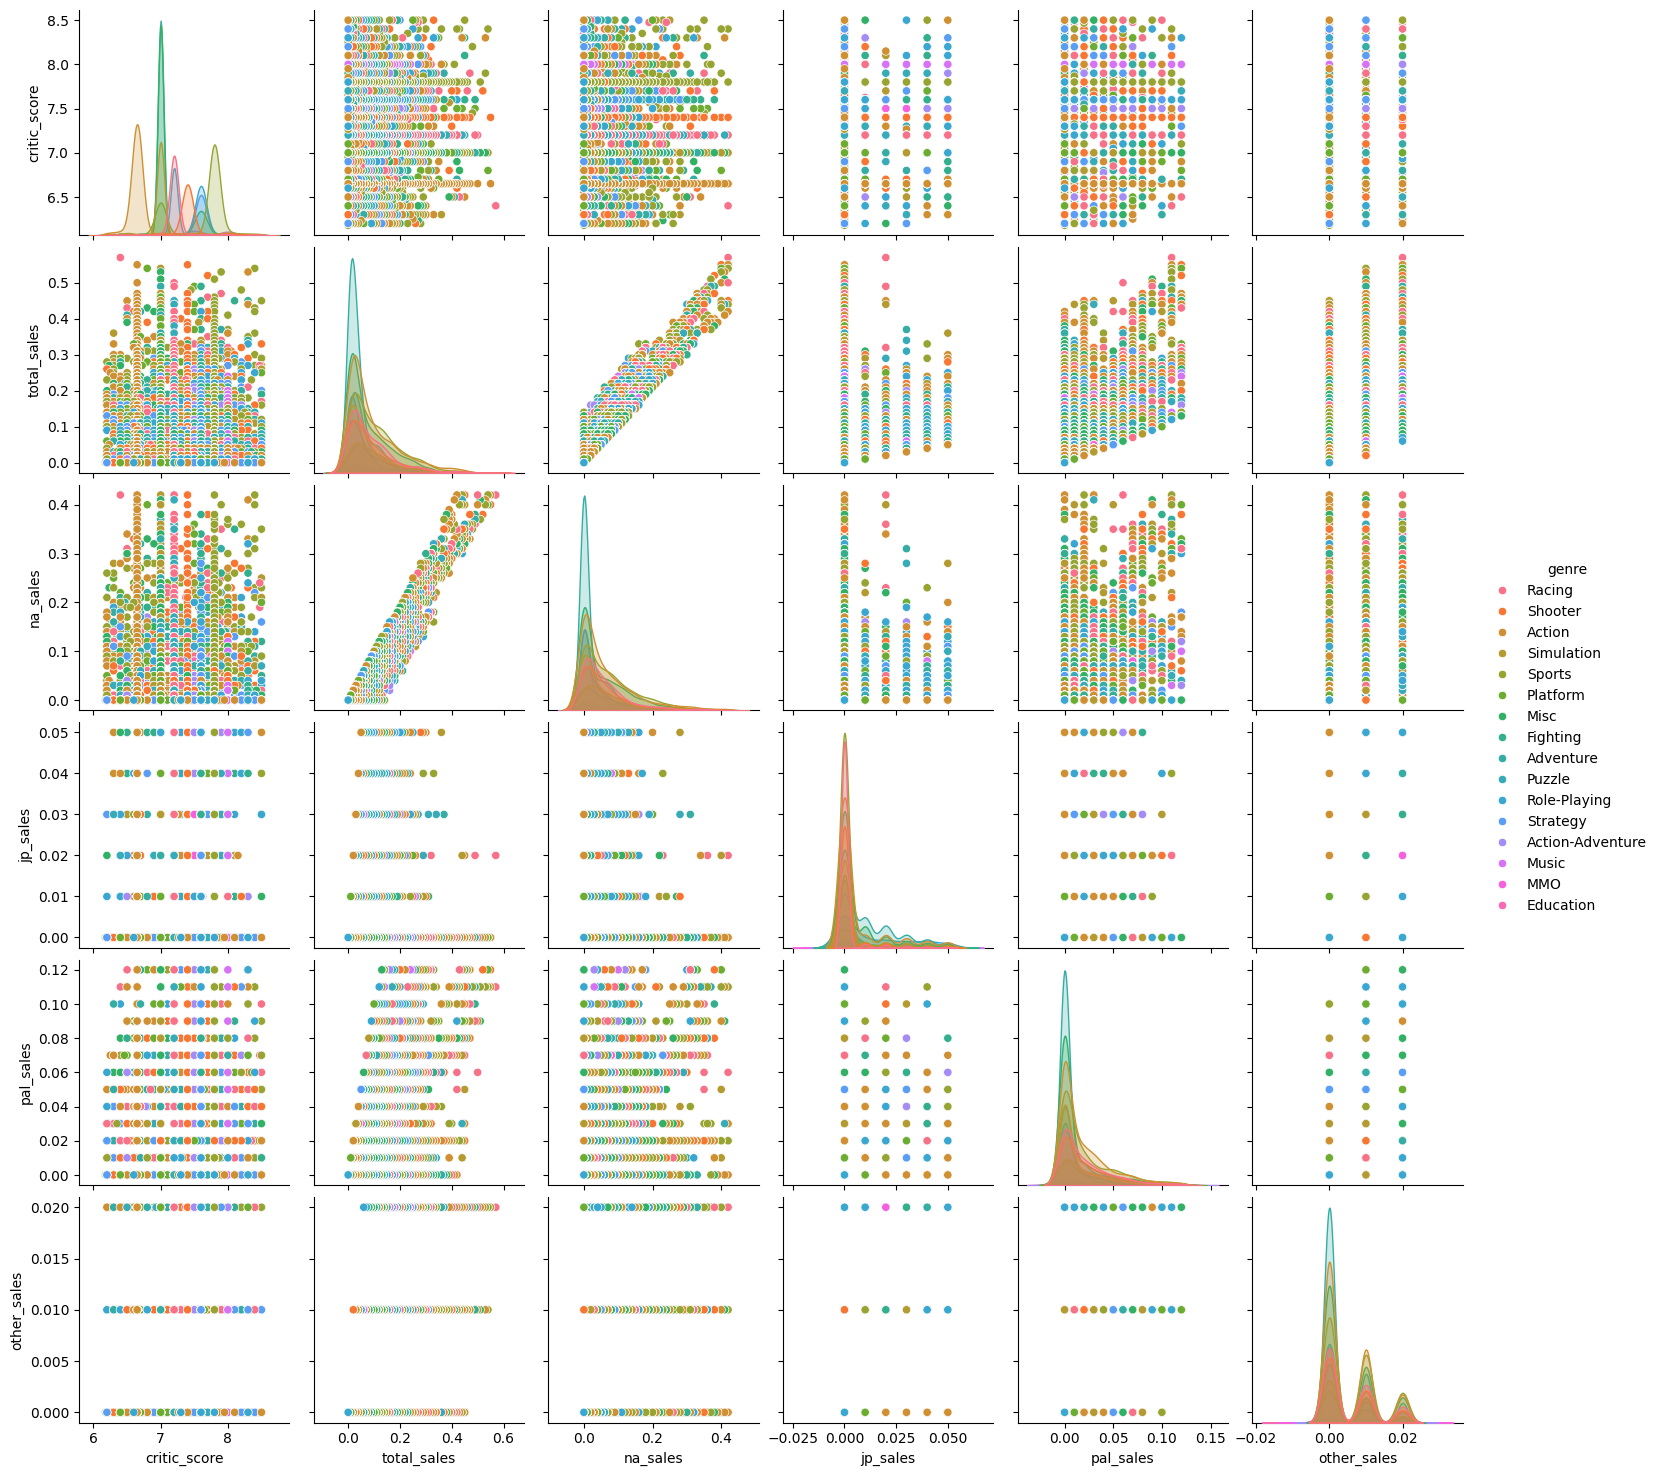

In [127]:
# Create a pairplot to visualize the pairwise relationships in the dataset

sns.pairplot(cleanedDf, hue='genre')
plt.show()

## 3.3 Insights

1. The total sales of Games is heavily correlated with the total sales in North America.
2. According to some models, the total sales is correlated with the critics score, but it is not definate.
3. The Game "Genre" is very important for a Games success.